# Sprint20セグメンテーション2

Kaggleコンペティションの情報を参考にセグメンテーションの精度を向上させます。

TGS Salt Identification Challengのデータセットの学習・推定を行います。

https://www.kaggle.com/c/tgs-salt-identification-challenge

# 【問題1】コードレビュー

転移学習を使用してセグメンテーションの精度を改善したコードを提示するので、レビューを行ってください。

"def unet_resnet"内で転移学習を行なっている。  
→Resnet50をエンコーダーとしている。

下記、黒がResnet50で流用箇所、赤が新規追加箇所
"def unet_resnet"で下記モデルが生成されている。  
主に、Center block, Decoder part, # Final upsampling and decoder block for segmentationの  
3つに分かれる。  

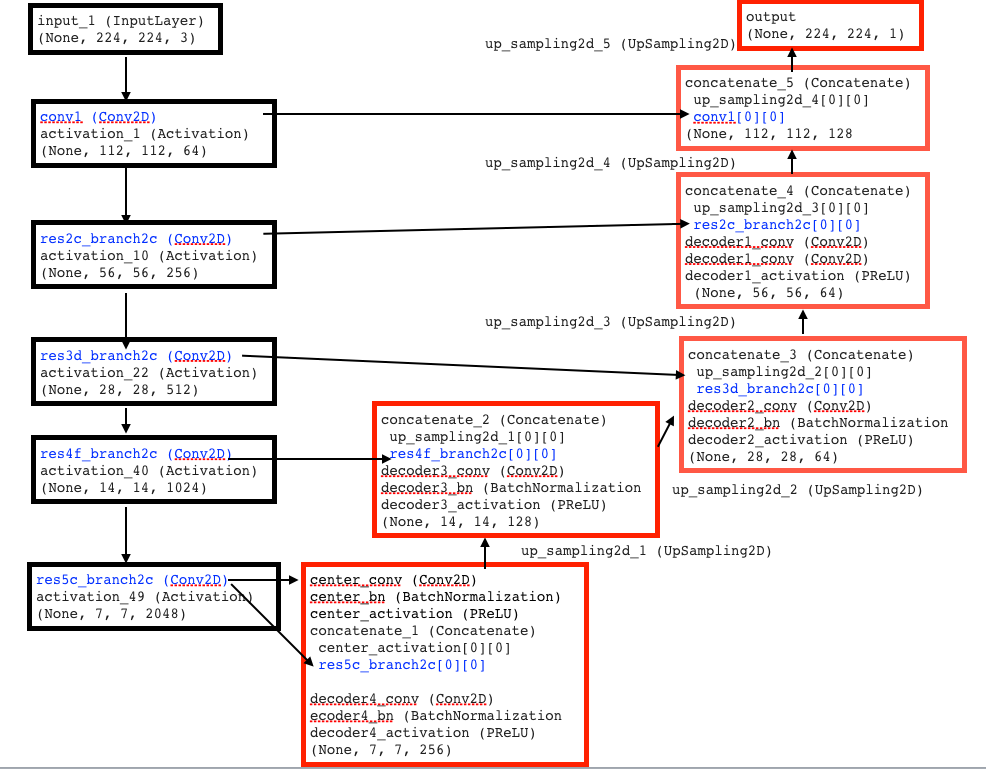

In [1]:
from IPython.display import Image
Image("Sprint_20_base.png")

# 【問題2】コードの書き換え

エンコーダーにResNetが使用されていたコードをVGGに変更してください。

ベースモデルをVGGに変更した  
unet_resnetのエンコーダの参照先をVGGに変更した   

"def unet_resnet"内

変更前

~~~
# Base model - encoder
base_model = ResNet50(
    input_shape=input_size, 
    include_top=False,
    weights=weights)

# Layers for feature extraction in the encoder part
encoder1 = base_model.get_layer('conv1').output
encoder2 = base_model.get_layer('res2c_branch2c').output
encoder3 = base_model.get_layer('res3d_branch2c').output
encoder4 = base_model.get_layer('res4f_branch2c').output
encoder5 = base_model.get_layer('res5c_branch2c').output
~~~

変更後
~~~
# Base model - encoder
base_model = VGG16(
    input_shape=input_size, 
    include_top=False,
    weights=weights)

# Layers for feature extraction in the encoder part
encoder1 = base_model.get_layer('block2_conv2').output
encoder2 = base_model.get_layer('block3_conv3').output
encoder3 = base_model.get_layer('block4_conv3').output
encoder4 = base_model.get_layer('block5_conv3').output
encoder5 = base_model.get_layer('block5_pool').output
~~~

# 【問題3】学習・推定

ResNetとVGG双方のコードで学習・推定を行い、結果を比較してください

epoch = 25で実施

ResNetベースのUnet:  IOU 0.6914  
VGGベーズのUnet:  0.6624   
→VGG16とResNet50では、ResNet50の方が精度が出るモデルなので、U-Netにした場合でも精度が出る?  

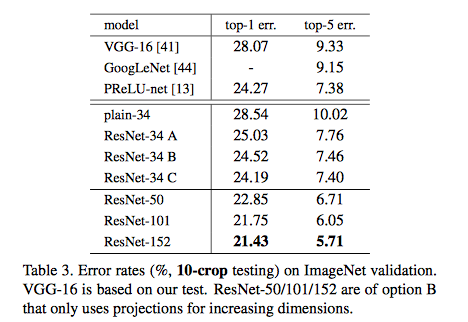

In [2]:
# 参考
# https://arxiv.org/pdf/1512.03385.pdf

from IPython.display import Image
Image("ResNet_paper.png")

## ResNet

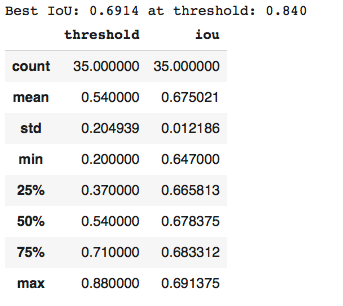

In [2]:
Image("ResNet_iOU.png")

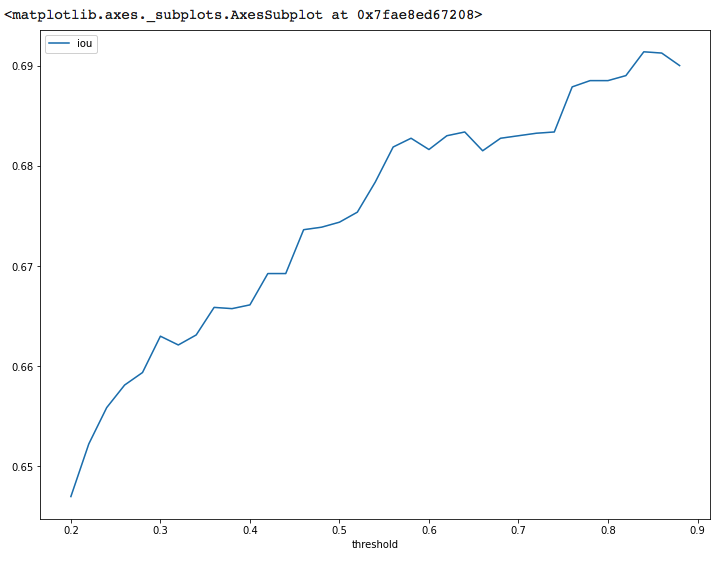

In [3]:
Image("ResNet_PlotiOU.png")

## VGG

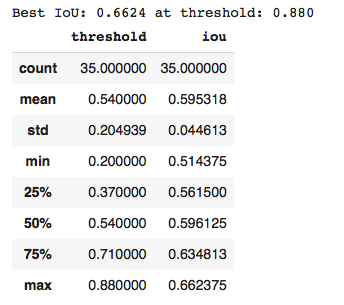

In [12]:
Image("VGG_iOU.png")

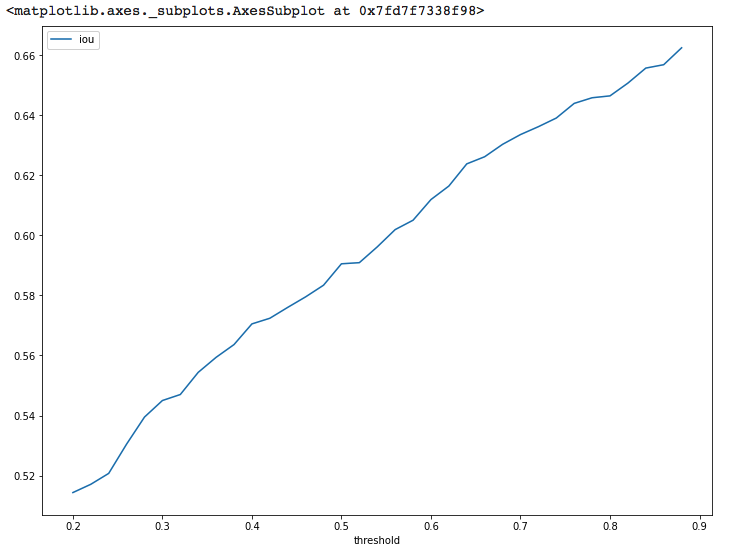

In [13]:
Image("VGG_PlotiOU.png")

## ResNetの学習の実行結果

~~~
/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
==================================================================================================
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 112, 112, 64) 0           bn_conv1[0][0]                   
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 114, 114, 64) 0           activation_1[0][0]               
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 56, 56, 64)   0           pool1_pad[0][0]                  
__________________________________________________________________________________________________
res2a_branch2a (Conv2D)         (None, 56, 56, 64)   4160        max_pooling2d_1[0][0]            
__________________________________________________________________________________________________
bn2a_branch2a (BatchNormalizati (None, 56, 56, 64)   256         res2a_branch2a[0][0]             
__________________________________________________________________________________________________
activation_2 (Activation)       (None, 56, 56, 64)   0           bn2a_branch2a[0][0]              
__________________________________________________________________________________________________
res2a_branch2b (Conv2D)         (None, 56, 56, 64)   36928       activation_2[0][0]               
__________________________________________________________________________________________________
bn2a_branch2b (BatchNormalizati (None, 56, 56, 64)   256         res2a_branch2b[0][0]             
__________________________________________________________________________________________________
activation_3 (Activation)       (None, 56, 56, 64)   0           bn2a_branch2b[0][0]              
__________________________________________________________________________________________________
res2a_branch2c (Conv2D)         (None, 56, 56, 256)  16640       activation_3[0][0]               
__________________________________________________________________________________________________
res2a_branch1 (Conv2D)          (None, 56, 56, 256)  16640       max_pooling2d_1[0][0]            
__________________________________________________________________________________________________
bn2a_branch2c (BatchNormalizati (None, 56, 56, 256)  1024        res2a_branch2c[0][0]             
__________________________________________________________________________________________________
bn2a_branch1 (BatchNormalizatio (None, 56, 56, 256)  1024        res2a_branch1[0][0]              
__________________________________________________________________________________________________
add_1 (Add)                     (None, 56, 56, 256)  0           bn2a_branch2c[0][0]              
                                                                 bn2a_branch1[0][0]               
__________________________________________________________________________________________________
activation_4 (Activation)       (None, 56, 56, 256)  0           add_1[0][0]                      
__________________________________________________________________________________________________
res2b_branch2a (Conv2D)         (None, 56, 56, 64)   16448       activation_4[0][0]               
__________________________________________________________________________________________________
bn2b_branch2a (BatchNormalizati (None, 56, 56, 64)   256         res2b_branch2a[0][0]             
__________________________________________________________________________________________________
activation_5 (Activation)       (None, 56, 56, 64)   0           bn2b_branch2a[0][0]              
__________________________________________________________________________________________________
res2b_branch2b (Conv2D)         (None, 56, 56, 64)   36928       activation_5[0][0]               
__________________________________________________________________________________________________
bn2b_branch2b (BatchNormalizati (None, 56, 56, 64)   256         res2b_branch2b[0][0]             
__________________________________________________________________________________________________
activation_6 (Activation)       (None, 56, 56, 64)   0           bn2b_branch2b[0][0]              
__________________________________________________________________________________________________
res2b_branch2c (Conv2D)         (None, 56, 56, 256)  16640       activation_6[0][0]               
__________________________________________________________________________________________________
bn2b_branch2c (BatchNormalizati (None, 56, 56, 256)  1024        res2b_branch2c[0][0]             
__________________________________________________________________________________________________
add_2 (Add)                     (None, 56, 56, 256)  0           bn2b_branch2c[0][0]              
                                                                 activation_4[0][0]               
__________________________________________________________________________________________________
activation_7 (Activation)       (None, 56, 56, 256)  0           add_2[0][0]                      
__________________________________________________________________________________________________
res2c_branch2a (Conv2D)         (None, 56, 56, 64)   16448       activation_7[0][0]               
__________________________________________________________________________________________________
bn2c_branch2a (BatchNormalizati (None, 56, 56, 64)   256         res2c_branch2a[0][0]             
__________________________________________________________________________________________________
activation_8 (Activation)       (None, 56, 56, 64)   0           bn2c_branch2a[0][0]              
__________________________________________________________________________________________________
res2c_branch2b (Conv2D)         (None, 56, 56, 64)   36928       activation_8[0][0]               
__________________________________________________________________________________________________
bn2c_branch2b (BatchNormalizati (None, 56, 56, 64)   256         res2c_branch2b[0][0]             
__________________________________________________________________________________________________
activation_9 (Activation)       (None, 56, 56, 64)   0           bn2c_branch2b[0][0]              
__________________________________________________________________________________________________
res2c_branch2c (Conv2D)         (None, 56, 56, 256)  16640       activation_9[0][0]               
__________________________________________________________________________________________________
bn2c_branch2c (BatchNormalizati (None, 56, 56, 256)  1024        res2c_branch2c[0][0]             
__________________________________________________________________________________________________
add_3 (Add)                     (None, 56, 56, 256)  0           bn2c_branch2c[0][0]              
                                                                 activation_7[0][0]               
__________________________________________________________________________________________________
activation_10 (Activation)      (None, 56, 56, 256)  0           add_3[0][0]                      
__________________________________________________________________________________________________
res3a_branch2a (Conv2D)         (None, 28, 28, 128)  32896       activation_10[0][0]              
__________________________________________________________________________________________________
bn3a_branch2a (BatchNormalizati (None, 28, 28, 128)  512         res3a_branch2a[0][0]             
__________________________________________________________________________________________________
activation_11 (Activation)      (None, 28, 28, 128)  0           bn3a_branch2a[0][0]              
__________________________________________________________________________________________________
res3a_branch2b (Conv2D)         (None, 28, 28, 128)  147584      activation_11[0][0]              
__________________________________________________________________________________________________
bn3a_branch2b (BatchNormalizati (None, 28, 28, 128)  512         res3a_branch2b[0][0]             
__________________________________________________________________________________________________
activation_12 (Activation)      (None, 28, 28, 128)  0           bn3a_branch2b[0][0]              
__________________________________________________________________________________________________
res3a_branch2c (Conv2D)         (None, 28, 28, 512)  66048       activation_12[0][0]              
__________________________________________________________________________________________________
res3a_branch1 (Conv2D)          (None, 28, 28, 512)  131584      activation_10[0][0]              
__________________________________________________________________________________________________
bn3a_branch2c (BatchNormalizati (None, 28, 28, 512)  2048        res3a_branch2c[0][0]             
__________________________________________________________________________________________________
bn3a_branch1 (BatchNormalizatio (None, 28, 28, 512)  2048        res3a_branch1[0][0]              
__________________________________________________________________________________________________
add_4 (Add)                     (None, 28, 28, 512)  0           bn3a_branch2c[0][0]              
                                                                 bn3a_branch1[0][0]               
__________________________________________________________________________________________________
activation_13 (Activation)      (None, 28, 28, 512)  0           add_4[0][0]                      
__________________________________________________________________________________________________
res3b_branch2a (Conv2D)         (None, 28, 28, 128)  65664       activation_13[0][0]              
__________________________________________________________________________________________________
bn3b_branch2a (BatchNormalizati (None, 28, 28, 128)  512         res3b_branch2a[0][0]             
__________________________________________________________________________________________________
activation_14 (Activation)      (None, 28, 28, 128)  0           bn3b_branch2a[0][0]              
__________________________________________________________________________________________________
res3b_branch2b (Conv2D)         (None, 28, 28, 128)  147584      activation_14[0][0]              
__________________________________________________________________________________________________
bn3b_branch2b (BatchNormalizati (None, 28, 28, 128)  512         res3b_branch2b[0][0]             
__________________________________________________________________________________________________
activation_15 (Activation)      (None, 28, 28, 128)  0           bn3b_branch2b[0][0]              
__________________________________________________________________________________________________
res3b_branch2c (Conv2D)         (None, 28, 28, 512)  66048       activation_15[0][0]              
__________________________________________________________________________________________________
bn3b_branch2c (BatchNormalizati (None, 28, 28, 512)  2048        res3b_branch2c[0][0]             
__________________________________________________________________________________________________
add_5 (Add)                     (None, 28, 28, 512)  0           bn3b_branch2c[0][0]              
                                                                 activation_13[0][0]              
__________________________________________________________________________________________________
activation_16 (Activation)      (None, 28, 28, 512)  0           add_5[0][0]                      
__________________________________________________________________________________________________
res3c_branch2a (Conv2D)         (None, 28, 28, 128)  65664       activation_16[0][0]              
__________________________________________________________________________________________________
bn3c_branch2a (BatchNormalizati (None, 28, 28, 128)  512         res3c_branch2a[0][0]             
__________________________________________________________________________________________________
activation_17 (Activation)      (None, 28, 28, 128)  0           bn3c_branch2a[0][0]              
__________________________________________________________________________________________________
res3c_branch2b (Conv2D)         (None, 28, 28, 128)  147584      activation_17[0][0]              
__________________________________________________________________________________________________
bn3c_branch2b (BatchNormalizati (None, 28, 28, 128)  512         res3c_branch2b[0][0]             
__________________________________________________________________________________________________
activation_18 (Activation)      (None, 28, 28, 128)  0           bn3c_branch2b[0][0]              
__________________________________________________________________________________________________
res3c_branch2c (Conv2D)         (None, 28, 28, 512)  66048       activation_18[0][0]              
__________________________________________________________________________________________________
bn3c_branch2c (BatchNormalizati (None, 28, 28, 512)  2048        res3c_branch2c[0][0]             
__________________________________________________________________________________________________
add_6 (Add)                     (None, 28, 28, 512)  0           bn3c_branch2c[0][0]              
                                                                 activation_16[0][0]              
__________________________________________________________________________________________________
activation_19 (Activation)      (None, 28, 28, 512)  0           add_6[0][0]                      
__________________________________________________________________________________________________
res3d_branch2a (Conv2D)         (None, 28, 28, 128)  65664       activation_19[0][0]              
__________________________________________________________________________________________________
bn3d_branch2a (BatchNormalizati (None, 28, 28, 128)  512         res3d_branch2a[0][0]             
__________________________________________________________________________________________________
activation_20 (Activation)      (None, 28, 28, 128)  0           bn3d_branch2a[0][0]              
__________________________________________________________________________________________________
res3d_branch2b (Conv2D)         (None, 28, 28, 128)  147584      activation_20[0][0]              
__________________________________________________________________________________________________
bn3d_branch2b (BatchNormalizati (None, 28, 28, 128)  512         res3d_branch2b[0][0]             
__________________________________________________________________________________________________
activation_21 (Activation)      (None, 28, 28, 128)  0           bn3d_branch2b[0][0]              
__________________________________________________________________________________________________
res3d_branch2c (Conv2D)         (None, 28, 28, 512)  66048       activation_21[0][0]              
__________________________________________________________________________________________________
bn3d_branch2c (BatchNormalizati (None, 28, 28, 512)  2048        res3d_branch2c[0][0]             
__________________________________________________________________________________________________
add_7 (Add)                     (None, 28, 28, 512)  0           bn3d_branch2c[0][0]              
                                                                 activation_19[0][0]              
__________________________________________________________________________________________________
activation_22 (Activation)      (None, 28, 28, 512)  0           add_7[0][0]                      
__________________________________________________________________________________________________
res4a_branch2a (Conv2D)         (None, 14, 14, 256)  131328      activation_22[0][0]              
__________________________________________________________________________________________________
bn4a_branch2a (BatchNormalizati (None, 14, 14, 256)  1024        res4a_branch2a[0][0]             
__________________________________________________________________________________________________
activation_23 (Activation)      (None, 14, 14, 256)  0           bn4a_branch2a[0][0]              
__________________________________________________________________________________________________
res4a_branch2b (Conv2D)         (None, 14, 14, 256)  590080      activation_23[0][0]              
__________________________________________________________________________________________________
bn4a_branch2b (BatchNormalizati (None, 14, 14, 256)  1024        res4a_branch2b[0][0]             
__________________________________________________________________________________________________
activation_24 (Activation)      (None, 14, 14, 256)  0           bn4a_branch2b[0][0]              
__________________________________________________________________________________________________
res4a_branch2c (Conv2D)         (None, 14, 14, 1024) 263168      activation_24[0][0]              
__________________________________________________________________________________________________
res4a_branch1 (Conv2D)          (None, 14, 14, 1024) 525312      activation_22[0][0]              
__________________________________________________________________________________________________
bn4a_branch2c (BatchNormalizati (None, 14, 14, 1024) 4096        res4a_branch2c[0][0]             
__________________________________________________________________________________________________
bn4a_branch1 (BatchNormalizatio (None, 14, 14, 1024) 4096        res4a_branch1[0][0]              
__________________________________________________________________________________________________
add_8 (Add)                     (None, 14, 14, 1024) 0           bn4a_branch2c[0][0]              
                                                                 bn4a_branch1[0][0]               
__________________________________________________________________________________________________
activation_25 (Activation)      (None, 14, 14, 1024) 0           add_8[0][0]                      
__________________________________________________________________________________________________
res4b_branch2a (Conv2D)         (None, 14, 14, 256)  262400      activation_25[0][0]              
__________________________________________________________________________________________________
bn4b_branch2a (BatchNormalizati (None, 14, 14, 256)  1024        res4b_branch2a[0][0]             
__________________________________________________________________________________________________
activation_26 (Activation)      (None, 14, 14, 256)  0           bn4b_branch2a[0][0]              
__________________________________________________________________________________________________
res4b_branch2b (Conv2D)         (None, 14, 14, 256)  590080      activation_26[0][0]              
__________________________________________________________________________________________________
bn4b_branch2b (BatchNormalizati (None, 14, 14, 256)  1024        res4b_branch2b[0][0]             
__________________________________________________________________________________________________
activation_27 (Activation)      (None, 14, 14, 256)  0           bn4b_branch2b[0][0]              
__________________________________________________________________________________________________
res4b_branch2c (Conv2D)         (None, 14, 14, 1024) 263168      activation_27[0][0]              
__________________________________________________________________________________________________
bn4b_branch2c (BatchNormalizati (None, 14, 14, 1024) 4096        res4b_branch2c[0][0]             
__________________________________________________________________________________________________
add_9 (Add)                     (None, 14, 14, 1024) 0           bn4b_branch2c[0][0]              
                                                                 activation_25[0][0]              
__________________________________________________________________________________________________
activation_28 (Activation)      (None, 14, 14, 1024) 0           add_9[0][0]                      
__________________________________________________________________________________________________
res4c_branch2a (Conv2D)         (None, 14, 14, 256)  262400      activation_28[0][0]              
__________________________________________________________________________________________________
bn4c_branch2a (BatchNormalizati (None, 14, 14, 256)  1024        res4c_branch2a[0][0]             
__________________________________________________________________________________________________
activation_29 (Activation)      (None, 14, 14, 256)  0           bn4c_branch2a[0][0]              
__________________________________________________________________________________________________
res4c_branch2b (Conv2D)         (None, 14, 14, 256)  590080      activation_29[0][0]              
__________________________________________________________________________________________________
bn4c_branch2b (BatchNormalizati (None, 14, 14, 256)  1024        res4c_branch2b[0][0]             
__________________________________________________________________________________________________
activation_30 (Activation)      (None, 14, 14, 256)  0           bn4c_branch2b[0][0]              
__________________________________________________________________________________________________
res4c_branch2c (Conv2D)         (None, 14, 14, 1024) 263168      activation_30[0][0]              
__________________________________________________________________________________________________
bn4c_branch2c (BatchNormalizati (None, 14, 14, 1024) 4096        res4c_branch2c[0][0]             
__________________________________________________________________________________________________
add_10 (Add)                    (None, 14, 14, 1024) 0           bn4c_branch2c[0][0]              
                                                                 activation_28[0][0]              
__________________________________________________________________________________________________
activation_31 (Activation)      (None, 14, 14, 1024) 0           add_10[0][0]                     
__________________________________________________________________________________________________
res4d_branch2a (Conv2D)         (None, 14, 14, 256)  262400      activation_31[0][0]              
__________________________________________________________________________________________________
bn4d_branch2a (BatchNormalizati (None, 14, 14, 256)  1024        res4d_branch2a[0][0]             
__________________________________________________________________________________________________
activation_32 (Activation)      (None, 14, 14, 256)  0           bn4d_branch2a[0][0]              
__________________________________________________________________________________________________
res4d_branch2b (Conv2D)         (None, 14, 14, 256)  590080      activation_32[0][0]              
__________________________________________________________________________________________________
bn4d_branch2b (BatchNormalizati (None, 14, 14, 256)  1024        res4d_branch2b[0][0]             
__________________________________________________________________________________________________
activation_33 (Activation)      (None, 14, 14, 256)  0           bn4d_branch2b[0][0]              
__________________________________________________________________________________________________
res4d_branch2c (Conv2D)         (None, 14, 14, 1024) 263168      activation_33[0][0]              
__________________________________________________________________________________________________
bn4d_branch2c (BatchNormalizati (None, 14, 14, 1024) 4096        res4d_branch2c[0][0]             
__________________________________________________________________________________________________
add_11 (Add)                    (None, 14, 14, 1024) 0           bn4d_branch2c[0][0]              
                                                                 activation_31[0][0]              
__________________________________________________________________________________________________
activation_34 (Activation)      (None, 14, 14, 1024) 0           add_11[0][0]                     
__________________________________________________________________________________________________
res4e_branch2a (Conv2D)         (None, 14, 14, 256)  262400      activation_34[0][0]              
__________________________________________________________________________________________________
bn4e_branch2a (BatchNormalizati (None, 14, 14, 256)  1024        res4e_branch2a[0][0]             
__________________________________________________________________________________________________
activation_35 (Activation)      (None, 14, 14, 256)  0           bn4e_branch2a[0][0]              
__________________________________________________________________________________________________
res4e_branch2b (Conv2D)         (None, 14, 14, 256)  590080      activation_35[0][0]              
__________________________________________________________________________________________________
bn4e_branch2b (BatchNormalizati (None, 14, 14, 256)  1024        res4e_branch2b[0][0]             
__________________________________________________________________________________________________
activation_36 (Activation)      (None, 14, 14, 256)  0           bn4e_branch2b[0][0]              
__________________________________________________________________________________________________
res4e_branch2c (Conv2D)         (None, 14, 14, 1024) 263168      activation_36[0][0]              
__________________________________________________________________________________________________
bn4e_branch2c (BatchNormalizati (None, 14, 14, 1024) 4096        res4e_branch2c[0][0]             
__________________________________________________________________________________________________
add_12 (Add)                    (None, 14, 14, 1024) 0           bn4e_branch2c[0][0]              
                                                                 activation_34[0][0]              
__________________________________________________________________________________________________
activation_37 (Activation)      (None, 14, 14, 1024) 0           add_12[0][0]                     
__________________________________________________________________________________________________
res4f_branch2a (Conv2D)         (None, 14, 14, 256)  262400      activation_37[0][0]              
__________________________________________________________________________________________________
bn4f_branch2a (BatchNormalizati (None, 14, 14, 256)  1024        res4f_branch2a[0][0]             
__________________________________________________________________________________________________
activation_38 (Activation)      (None, 14, 14, 256)  0           bn4f_branch2a[0][0]              
__________________________________________________________________________________________________
res4f_branch2b (Conv2D)         (None, 14, 14, 256)  590080      activation_38[0][0]              
__________________________________________________________________________________________________
bn4f_branch2b (BatchNormalizati (None, 14, 14, 256)  1024        res4f_branch2b[0][0]             
__________________________________________________________________________________________________
activation_39 (Activation)      (None, 14, 14, 256)  0           bn4f_branch2b[0][0]              
__________________________________________________________________________________________________
res4f_branch2c (Conv2D)         (None, 14, 14, 1024) 263168      activation_39[0][0]              
__________________________________________________________________________________________________
bn4f_branch2c (BatchNormalizati (None, 14, 14, 1024) 4096        res4f_branch2c[0][0]             
__________________________________________________________________________________________________
add_13 (Add)                    (None, 14, 14, 1024) 0           bn4f_branch2c[0][0]              
                                                                 activation_37[0][0]              
__________________________________________________________________________________________________
activation_40 (Activation)      (None, 14, 14, 1024) 0           add_13[0][0]                     
__________________________________________________________________________________________________
res5a_branch2a (Conv2D)         (None, 7, 7, 512)    524800      activation_40[0][0]              
__________________________________________________________________________________________________
bn5a_branch2a (BatchNormalizati (None, 7, 7, 512)    2048        res5a_branch2a[0][0]             
__________________________________________________________________________________________________
activation_41 (Activation)      (None, 7, 7, 512)    0           bn5a_branch2a[0][0]              
__________________________________________________________________________________________________
res5a_branch2b (Conv2D)         (None, 7, 7, 512)    2359808     activation_41[0][0]              
__________________________________________________________________________________________________
bn5a_branch2b (BatchNormalizati (None, 7, 7, 512)    2048        res5a_branch2b[0][0]             
__________________________________________________________________________________________________
activation_42 (Activation)      (None, 7, 7, 512)    0           bn5a_branch2b[0][0]              
__________________________________________________________________________________________________
res5a_branch2c (Conv2D)         (None, 7, 7, 2048)   1050624     activation_42[0][0]              
__________________________________________________________________________________________________
res5a_branch1 (Conv2D)          (None, 7, 7, 2048)   2099200     activation_40[0][0]              
__________________________________________________________________________________________________
bn5a_branch2c (BatchNormalizati (None, 7, 7, 2048)   8192        res5a_branch2c[0][0]             
__________________________________________________________________________________________________
bn5a_branch1 (BatchNormalizatio (None, 7, 7, 2048)   8192        res5a_branch1[0][0]              
__________________________________________________________________________________________________
add_14 (Add)                    (None, 7, 7, 2048)   0           bn5a_branch2c[0][0]              
                                                                 bn5a_branch1[0][0]               
__________________________________________________________________________________________________
activation_43 (Activation)      (None, 7, 7, 2048)   0           add_14[0][0]                     
__________________________________________________________________________________________________
res5b_branch2a (Conv2D)         (None, 7, 7, 512)    1049088     activation_43[0][0]              
__________________________________________________________________________________________________
bn5b_branch2a (BatchNormalizati (None, 7, 7, 512)    2048        res5b_branch2a[0][0]             
__________________________________________________________________________________________________
activation_44 (Activation)      (None, 7, 7, 512)    0           bn5b_branch2a[0][0]              
__________________________________________________________________________________________________
res5b_branch2b (Conv2D)         (None, 7, 7, 512)    2359808     activation_44[0][0]              
__________________________________________________________________________________________________
bn5b_branch2b (BatchNormalizati (None, 7, 7, 512)    2048        res5b_branch2b[0][0]             
__________________________________________________________________________________________________
activation_45 (Activation)      (None, 7, 7, 512)    0           bn5b_branch2b[0][0]              
__________________________________________________________________________________________________
res5b_branch2c (Conv2D)         (None, 7, 7, 2048)   1050624     activation_45[0][0]              
__________________________________________________________________________________________________
bn5b_branch2c (BatchNormalizati (None, 7, 7, 2048)   8192        res5b_branch2c[0][0]             
__________________________________________________________________________________________________
add_15 (Add)                    (None, 7, 7, 2048)   0           bn5b_branch2c[0][0]              
                                                                 activation_43[0][0]              
__________________________________________________________________________________________________
activation_46 (Activation)      (None, 7, 7, 2048)   0           add_15[0][0]                     
__________________________________________________________________________________________________
res5c_branch2a (Conv2D)         (None, 7, 7, 512)    1049088     activation_46[0][0]              
__________________________________________________________________________________________________
bn5c_branch2a (BatchNormalizati (None, 7, 7, 512)    2048        res5c_branch2a[0][0]             
__________________________________________________________________________________________________
activation_47 (Activation)      (None, 7, 7, 512)    0           bn5c_branch2a[0][0]              
__________________________________________________________________________________________________
res5c_branch2b (Conv2D)         (None, 7, 7, 512)    2359808     activation_47[0][0]              
__________________________________________________________________________________________________
bn5c_branch2b (BatchNormalizati (None, 7, 7, 512)    2048        res5c_branch2b[0][0]             
__________________________________________________________________________________________________
activation_48 (Activation)      (None, 7, 7, 512)    0           bn5c_branch2b[0][0]              
__________________________________________________________________________________________________
res5c_branch2c (Conv2D)         (None, 7, 7, 2048)   1050624     activation_48[0][0]              
__________________________________________________________________________________________________
center_conv1 (Conv2D)           (None, 7, 7, 512)    9437696     res5c_branch2c[0][0]             
__________________________________________________________________________________________________
center_bn1 (BatchNormalization) (None, 7, 7, 512)    2048        center_conv1[0][0]               
__________________________________________________________________________________________________
center_activation1 (PReLU)      (None, 7, 7, 512)    25088       center_bn1[0][0]                 
__________________________________________________________________________________________________
dropout_1 (Dropout)             (None, 7, 7, 512)    0           center_activation1[0][0]         
__________________________________________________________________________________________________
center_conv2 (Conv2D)           (None, 7, 7, 256)    1179904     dropout_1[0][0]                  
__________________________________________________________________________________________________
center_bn2 (BatchNormalization) (None, 7, 7, 256)    1024        center_conv2[0][0]               
__________________________________________________________________________________________________
center_activation2 (PReLU)      (None, 7, 7, 256)    12544       center_bn2[0][0]                 
__________________________________________________________________________________________________
dropout_2 (Dropout)             (None, 7, 7, 256)    0           center_activation2[0][0]         
__________________________________________________________________________________________________
center_conv3 (Conv2D)           (None, 7, 7, 512)    1180160     dropout_2[0][0]                  
__________________________________________________________________________________________________
center_bn3 (BatchNormalization) (None, 7, 7, 512)    2048        center_conv3[0][0]               
__________________________________________________________________________________________________
center_activation3 (PReLU)      (None, 7, 7, 512)    25088       center_bn3[0][0]                 
__________________________________________________________________________________________________
dropout_3 (Dropout)             (None, 7, 7, 512)    0           center_activation3[0][0]         
__________________________________________________________________________________________________
add_17 (Add)                    (None, 7, 7, 512)    0           dropout_1[0][0]                  
                                                                 dropout_3[0][0]                  
__________________________________________________________________________________________________
concatenate_1 (Concatenate)     (None, 7, 7, 2560)   0           add_17[0][0]                     
                                                                 res5c_branch2c[0][0]             
__________________________________________________________________________________________________
decoder4_conv1 (Conv2D)         (None, 7, 7, 256)    5898496     concatenate_1[0][0]              
__________________________________________________________________________________________________
decoder4_bn1 (BatchNormalizatio (None, 7, 7, 256)    1024        decoder4_conv1[0][0]             
__________________________________________________________________________________________________
decoder4_activation1 (PReLU)    (None, 7, 7, 256)    12544       decoder4_bn1[0][0]               
__________________________________________________________________________________________________
dropout_4 (Dropout)             (None, 7, 7, 256)    0           decoder4_activation1[0][0]       
__________________________________________________________________________________________________
decoder4_conv2 (Conv2D)         (None, 7, 7, 128)    295040      dropout_4[0][0]                  
__________________________________________________________________________________________________
decoder4_bn2 (BatchNormalizatio (None, 7, 7, 128)    512         decoder4_conv2[0][0]             
__________________________________________________________________________________________________
decoder4_activation2 (PReLU)    (None, 7, 7, 128)    6272        decoder4_bn2[0][0]               
__________________________________________________________________________________________________
dropout_5 (Dropout)             (None, 7, 7, 128)    0           decoder4_activation2[0][0]       
__________________________________________________________________________________________________
decoder4_conv3 (Conv2D)         (None, 7, 7, 256)    295168      dropout_5[0][0]                  
__________________________________________________________________________________________________
decoder4_bn3 (BatchNormalizatio (None, 7, 7, 256)    1024        decoder4_conv3[0][0]             
__________________________________________________________________________________________________
decoder4_activation3 (PReLU)    (None, 7, 7, 256)    12544       decoder4_bn3[0][0]               
__________________________________________________________________________________________________
dropout_6 (Dropout)             (None, 7, 7, 256)    0           decoder4_activation3[0][0]       
__________________________________________________________________________________________________
add_18 (Add)                    (None, 7, 7, 256)    0           dropout_4[0][0]                  
                                                                 dropout_6[0][0]                  
__________________________________________________________________________________________________
up_sampling2d_1 (UpSampling2D)  (None, 14, 14, 256)  0           add_18[0][0]                     
__________________________________________________________________________________________________
concatenate_2 (Concatenate)     (None, 14, 14, 1280) 0           up_sampling2d_1[0][0]            
                                                                 res4f_branch2c[0][0]             
__________________________________________________________________________________________________
decoder3_conv1 (Conv2D)         (None, 14, 14, 128)  1474688     concatenate_2[0][0]              
__________________________________________________________________________________________________
decoder3_bn1 (BatchNormalizatio (None, 14, 14, 128)  512         decoder3_conv1[0][0]             
__________________________________________________________________________________________________
decoder3_activation1 (PReLU)    (None, 14, 14, 128)  25088       decoder3_bn1[0][0]               
__________________________________________________________________________________________________
dropout_7 (Dropout)             (None, 14, 14, 128)  0           decoder3_activation1[0][0]       
__________________________________________________________________________________________________
decoder3_conv2 (Conv2D)         (None, 14, 14, 64)   73792       dropout_7[0][0]                  
__________________________________________________________________________________________________
decoder3_bn2 (BatchNormalizatio (None, 14, 14, 64)   256         decoder3_conv2[0][0]             
__________________________________________________________________________________________________
decoder3_activation2 (PReLU)    (None, 14, 14, 64)   12544       decoder3_bn2[0][0]               
__________________________________________________________________________________________________
dropout_8 (Dropout)             (None, 14, 14, 64)   0           decoder3_activation2[0][0]       
__________________________________________________________________________________________________
decoder3_conv3 (Conv2D)         (None, 14, 14, 128)  73856       dropout_8[0][0]                  
__________________________________________________________________________________________________
decoder3_bn3 (BatchNormalizatio (None, 14, 14, 128)  512         decoder3_conv3[0][0]             
__________________________________________________________________________________________________
decoder3_activation3 (PReLU)    (None, 14, 14, 128)  25088       decoder3_bn3[0][0]               
__________________________________________________________________________________________________
dropout_9 (Dropout)             (None, 14, 14, 128)  0           decoder3_activation3[0][0]       
__________________________________________________________________________________________________
add_19 (Add)                    (None, 14, 14, 128)  0           dropout_7[0][0]                  
                                                                 dropout_9[0][0]                  
__________________________________________________________________________________________________
up_sampling2d_2 (UpSampling2D)  (None, 28, 28, 128)  0           add_19[0][0]                     
__________________________________________________________________________________________________
concatenate_3 (Concatenate)     (None, 28, 28, 640)  0           up_sampling2d_2[0][0]            
                                                                 res3d_branch2c[0][0]             
__________________________________________________________________________________________________
decoder2_conv1 (Conv2D)         (None, 28, 28, 64)   368704      concatenate_3[0][0]              
__________________________________________________________________________________________________
decoder2_bn1 (BatchNormalizatio (None, 28, 28, 64)   256         decoder2_conv1[0][0]             
__________________________________________________________________________________________________
decoder2_activation1 (PReLU)    (None, 28, 28, 64)   50176       decoder2_bn1[0][0]               
__________________________________________________________________________________________________
dropout_10 (Dropout)            (None, 28, 28, 64)   0           decoder2_activation1[0][0]       
__________________________________________________________________________________________________
decoder2_conv2 (Conv2D)         (None, 28, 28, 32)   18464       dropout_10[0][0]                 
__________________________________________________________________________________________________
decoder2_bn2 (BatchNormalizatio (None, 28, 28, 32)   128         decoder2_conv2[0][0]             
__________________________________________________________________________________________________
decoder2_activation2 (PReLU)    (None, 28, 28, 32)   25088       decoder2_bn2[0][0]               
__________________________________________________________________________________________________
dropout_11 (Dropout)            (None, 28, 28, 32)   0           decoder2_activation2[0][0]       
__________________________________________________________________________________________________
decoder2_conv3 (Conv2D)         (None, 28, 28, 64)   18496       dropout_11[0][0]                 
__________________________________________________________________________________________________
decoder2_bn3 (BatchNormalizatio (None, 28, 28, 64)   256         decoder2_conv3[0][0]             
__________________________________________________________________________________________________
decoder2_activation3 (PReLU)    (None, 28, 28, 64)   50176       decoder2_bn3[0][0]               
__________________________________________________________________________________________________
dropout_12 (Dropout)            (None, 28, 28, 64)   0           decoder2_activation3[0][0]       
__________________________________________________________________________________________________
add_20 (Add)                    (None, 28, 28, 64)   0           dropout_10[0][0]                 
                                                                 dropout_12[0][0]                 
__________________________________________________________________________________________________
up_sampling2d_3 (UpSampling2D)  (None, 56, 56, 64)   0           add_20[0][0]                     
__________________________________________________________________________________________________
concatenate_4 (Concatenate)     (None, 56, 56, 320)  0           up_sampling2d_3[0][0]            
                                                                 res2c_branch2c[0][0]             
__________________________________________________________________________________________________
decoder1_conv1 (Conv2D)         (None, 56, 56, 64)   184384      concatenate_4[0][0]              
__________________________________________________________________________________________________
decoder1_bn1 (BatchNormalizatio (None, 56, 56, 64)   256         decoder1_conv1[0][0]             
__________________________________________________________________________________________________
decoder1_activation1 (PReLU)    (None, 56, 56, 64)   200704      decoder1_bn1[0][0]               
__________________________________________________________________________________________________
dropout_13 (Dropout)            (None, 56, 56, 64)   0           decoder1_activation1[0][0]       
__________________________________________________________________________________________________
decoder1_conv2 (Conv2D)         (None, 56, 56, 32)   18464       dropout_13[0][0]                 
__________________________________________________________________________________________________
decoder1_bn2 (BatchNormalizatio (None, 56, 56, 32)   128         decoder1_conv2[0][0]             
__________________________________________________________________________________________________
decoder1_activation2 (PReLU)    (None, 56, 56, 32)   100352      decoder1_bn2[0][0]               
__________________________________________________________________________________________________
dropout_14 (Dropout)            (None, 56, 56, 32)   0           decoder1_activation2[0][0]       
__________________________________________________________________________________________________
decoder1_conv3 (Conv2D)         (None, 56, 56, 64)   18496       dropout_14[0][0]                 
__________________________________________________________________________________________________
decoder1_bn3 (BatchNormalizatio (None, 56, 56, 64)   256         decoder1_conv3[0][0]             
__________________________________________________________________________________________________
decoder1_activation3 (PReLU)    (None, 56, 56, 64)   200704      decoder1_bn3[0][0]               
__________________________________________________________________________________________________
dropout_15 (Dropout)            (None, 56, 56, 64)   0           decoder1_activation3[0][0]       
__________________________________________________________________________________________________
add_21 (Add)                    (None, 56, 56, 64)   0           dropout_13[0][0]                 
                                                                 dropout_15[0][0]                 
__________________________________________________________________________________________________
up_sampling2d_4 (UpSampling2D)  (None, 112, 112, 64) 0           add_21[0][0]                     
__________________________________________________________________________________________________
concatenate_5 (Concatenate)     (None, 112, 112, 128 0           up_sampling2d_4[0][0]            
                                                                 conv1[0][0]                      
__________________________________________________________________________________________________
up_sampling2d_5 (UpSampling2D)  (None, 224, 224, 128 0           concatenate_5[0][0]              
__________________________________________________________________________________________________
decoder_output_conv1 (Conv2D)   (None, 224, 224, 32) 36896       up_sampling2d_5[0][0]            
__________________________________________________________________________________________________
decoder_output_bn1 (BatchNormal (None, 224, 224, 32) 128         decoder_output_conv1[0][0]       
__________________________________________________________________________________________________
decoder_output_activation1 (PRe (None, 224, 224, 32) 1605632     decoder_output_bn1[0][0]         
__________________________________________________________________________________________________
dropout_16 (Dropout)            (None, 224, 224, 32) 0           decoder_output_activation1[0][0] 
__________________________________________________________________________________________________
decoder_output_conv2 (Conv2D)   (None, 224, 224, 16) 4624        dropout_16[0][0]                 
__________________________________________________________________________________________________
decoder_output_bn2 (BatchNormal (None, 224, 224, 16) 64          decoder_output_conv2[0][0]       
__________________________________________________________________________________________________
decoder_output_activation2 (PRe (None, 224, 224, 16) 802816      decoder_output_bn2[0][0]         
__________________________________________________________________________________________________
dropout_17 (Dropout)            (None, 224, 224, 16) 0           decoder_output_activation2[0][0] 
__________________________________________________________________________________________________
decoder_output_conv3 (Conv2D)   (None, 224, 224, 32) 4640        dropout_17[0][0]                 
__________________________________________________________________________________________________
decoder_output_bn3 (BatchNormal (None, 224, 224, 32) 128         decoder_output_conv3[0][0]       
__________________________________________________________________________________________________
decoder_output_activation3 (PRe (None, 224, 224, 32) 1605632     decoder_output_bn3[0][0]         
__________________________________________________________________________________________________
dropout_18 (Dropout)            (None, 224, 224, 32) 0           decoder_output_activation3[0][0] 
__________________________________________________________________________________________________
add_22 (Add)                    (None, 224, 224, 32) 0           dropout_16[0][0]                 
                                                                 dropout_18[0][0]                 
__________________________________________________________________________________________________
prediction (Conv2D)             (None, 224, 224, 1)  33          add_22[0][0]                     
__________________________________________________________________________________________________
activation_50 (Activation)      (None, 224, 224, 1)  0           prediction[0][0]                 
==================================================================================================
Total params: 48,970,161
Trainable params: 48,915,857
Non-trainable params: 54,304
__________________________________________________________________________________________________
None
WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:422: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.

Train on 3200 samples, validate on 800 samples
Epoch 1/2
3200/3200 [==============================] - 261s 82ms/step - loss: 0.7296 - my_iou_metric: 0.3737 - val_loss: 1.5214 - val_my_iou_metric: 0.0108

Epoch 00001: val_my_iou_metric improved from -inf to 0.01075, saving model to unet_resnet.h5
Epoch 2/2
3200/3200 [==============================] - 233s 73ms/step - loss: 0.5697 - my_iou_metric: 0.5077 - val_loss: 3.9800 - val_my_iou_metric: 0.1324

Epoch 00002: val_my_iou_metric improved from 0.01075 to 0.13238, saving model to unet_resnet.h5

~~~

## VGGの学習の実行結果

~~~
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
==================================================================================================
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 224, 224, 64) 1792        input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv2 (Conv2D)           (None, 224, 224, 64) 36928       block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_pool (MaxPooling2D)      (None, 112, 112, 64) 0           block1_conv2[0][0]               
__________________________________________________________________________________________________
block2_conv1 (Conv2D)           (None, 112, 112, 128 73856       block1_pool[0][0]                
__________________________________________________________________________________________________
block2_conv2 (Conv2D)           (None, 112, 112, 128 147584      block2_conv1[0][0]               
__________________________________________________________________________________________________
block2_pool (MaxPooling2D)      (None, 56, 56, 128)  0           block2_conv2[0][0]               
__________________________________________________________________________________________________
block3_conv1 (Conv2D)           (None, 56, 56, 256)  295168      block2_pool[0][0]                
__________________________________________________________________________________________________
block3_conv2 (Conv2D)           (None, 56, 56, 256)  590080      block3_conv1[0][0]               
__________________________________________________________________________________________________
block3_conv3 (Conv2D)           (None, 56, 56, 256)  590080      block3_conv2[0][0]               
__________________________________________________________________________________________________
block3_pool (MaxPooling2D)      (None, 28, 28, 256)  0           block3_conv3[0][0]               
__________________________________________________________________________________________________
block4_conv1 (Conv2D)           (None, 28, 28, 512)  1180160     block3_pool[0][0]                
__________________________________________________________________________________________________
block4_conv2 (Conv2D)           (None, 28, 28, 512)  2359808     block4_conv1[0][0]               
__________________________________________________________________________________________________
block4_conv3 (Conv2D)           (None, 28, 28, 512)  2359808     block4_conv2[0][0]               
__________________________________________________________________________________________________
block4_pool (MaxPooling2D)      (None, 14, 14, 512)  0           block4_conv3[0][0]               
__________________________________________________________________________________________________
block5_conv1 (Conv2D)           (None, 14, 14, 512)  2359808     block4_pool[0][0]                
__________________________________________________________________________________________________
block5_conv2 (Conv2D)           (None, 14, 14, 512)  2359808     block5_conv1[0][0]               
__________________________________________________________________________________________________
block5_conv3 (Conv2D)           (None, 14, 14, 512)  2359808     block5_conv2[0][0]               
__________________________________________________________________________________________________
block5_pool (MaxPooling2D)      (None, 7, 7, 512)    0           block5_conv3[0][0]               
__________________________________________________________________________________________________
center_conv1 (Conv2D)           (None, 7, 7, 512)    2359808     block5_pool[0][0]                
__________________________________________________________________________________________________
dropout_1 (Dropout)             (None, 7, 7, 512)    0           center_conv1[0][0]               
__________________________________________________________________________________________________
center_conv2 (Conv2D)           (None, 7, 7, 256)    1179904     dropout_1[0][0]                  
__________________________________________________________________________________________________
center_bn2 (BatchNormalization) (None, 7, 7, 256)    1024        center_conv2[0][0]               
__________________________________________________________________________________________________
dropout_2 (Dropout)             (None, 7, 7, 256)    0           center_bn2[0][0]                 
__________________________________________________________________________________________________
concatenate_1 (Concatenate)     (None, 7, 7, 768)    0           dropout_2[0][0]                  
                                                                 block5_pool[0][0]                
__________________________________________________________________________________________________
decoder4_conv1 (Conv2D)         (None, 7, 7, 256)    1769728     concatenate_1[0][0]              
__________________________________________________________________________________________________
dropout_3 (Dropout)             (None, 7, 7, 256)    0           decoder4_conv1[0][0]             
__________________________________________________________________________________________________
decoder4_conv2 (Conv2D)         (None, 7, 7, 128)    295040      dropout_3[0][0]                  
__________________________________________________________________________________________________
decoder4_bn2 (BatchNormalizatio (None, 7, 7, 128)    512         decoder4_conv2[0][0]             
__________________________________________________________________________________________________
dropout_4 (Dropout)             (None, 7, 7, 128)    0           decoder4_bn2[0][0]               
__________________________________________________________________________________________________
up_sampling2d_1 (UpSampling2D)  (None, 14, 14, 128)  0           dropout_4[0][0]                  
__________________________________________________________________________________________________
concatenate_2 (Concatenate)     (None, 14, 14, 640)  0           up_sampling2d_1[0][0]            
                                                                 block5_conv3[0][0]               
__________________________________________________________________________________________________
decoder3_conv1 (Conv2D)         (None, 14, 14, 128)  737408      concatenate_2[0][0]              
__________________________________________________________________________________________________
dropout_5 (Dropout)             (None, 14, 14, 128)  0           decoder3_conv1[0][0]             
__________________________________________________________________________________________________
decoder3_conv2 (Conv2D)         (None, 14, 14, 64)   73792       dropout_5[0][0]                  
__________________________________________________________________________________________________
decoder3_bn2 (BatchNormalizatio (None, 14, 14, 64)   256         decoder3_conv2[0][0]             
__________________________________________________________________________________________________
dropout_6 (Dropout)             (None, 14, 14, 64)   0           decoder3_bn2[0][0]               
__________________________________________________________________________________________________
up_sampling2d_2 (UpSampling2D)  (None, 28, 28, 64)   0           dropout_6[0][0]                  
__________________________________________________________________________________________________
concatenate_3 (Concatenate)     (None, 28, 28, 576)  0           up_sampling2d_2[0][0]            
                                                                 block4_conv3[0][0]               
__________________________________________________________________________________________________
decoder2_conv1 (Conv2D)         (None, 28, 28, 64)   331840      concatenate_3[0][0]              
__________________________________________________________________________________________________
dropout_7 (Dropout)             (None, 28, 28, 64)   0           decoder2_conv1[0][0]             
__________________________________________________________________________________________________
decoder2_conv2 (Conv2D)         (None, 28, 28, 32)   18464       dropout_7[0][0]                  
__________________________________________________________________________________________________
decoder2_bn2 (BatchNormalizatio (None, 28, 28, 32)   128         decoder2_conv2[0][0]             
__________________________________________________________________________________________________
dropout_8 (Dropout)             (None, 28, 28, 32)   0           decoder2_bn2[0][0]               
__________________________________________________________________________________________________
up_sampling2d_3 (UpSampling2D)  (None, 56, 56, 32)   0           dropout_8[0][0]                  
__________________________________________________________________________________________________
concatenate_4 (Concatenate)     (None, 56, 56, 288)  0           up_sampling2d_3[0][0]            
                                                                 block3_conv3[0][0]               
__________________________________________________________________________________________________
decoder1_conv1 (Conv2D)         (None, 56, 56, 64)   165952      concatenate_4[0][0]              
__________________________________________________________________________________________________
dropout_9 (Dropout)             (None, 56, 56, 64)   0           decoder1_conv1[0][0]             
__________________________________________________________________________________________________
decoder1_conv2 (Conv2D)         (None, 56, 56, 32)   18464       dropout_9[0][0]                  
__________________________________________________________________________________________________
decoder1_bn2 (BatchNormalizatio (None, 56, 56, 32)   128         decoder1_conv2[0][0]             
__________________________________________________________________________________________________
dropout_10 (Dropout)            (None, 56, 56, 32)   0           decoder1_bn2[0][0]               
__________________________________________________________________________________________________
up_sampling2d_4 (UpSampling2D)  (None, 112, 112, 32) 0           dropout_10[0][0]                 
__________________________________________________________________________________________________
concatenate_5 (Concatenate)     (None, 112, 112, 160 0           up_sampling2d_4[0][0]            
                                                                 block2_conv2[0][0]               
__________________________________________________________________________________________________
up_sampling2d_5 (UpSampling2D)  (None, 224, 224, 160 0           concatenate_5[0][0]              
__________________________________________________________________________________________________
decoder_output_conv1 (Conv2D)   (None, 224, 224, 32) 46112       up_sampling2d_5[0][0]            
__________________________________________________________________________________________________
dropout_11 (Dropout)            (None, 224, 224, 32) 0           decoder_output_conv1[0][0]       
__________________________________________________________________________________________________
decoder_output_conv2 (Conv2D)   (None, 224, 224, 16) 4624        dropout_11[0][0]                 
__________________________________________________________________________________________________
decoder_output_bn2 (BatchNormal (None, 224, 224, 16) 64          decoder_output_conv2[0][0]       
__________________________________________________________________________________________________
dropout_12 (Dropout)            (None, 224, 224, 16) 0           decoder_output_bn2[0][0]         
__________________________________________________________________________________________________
prediction (Conv2D)             (None, 224, 224, 1)  17          dropout_12[0][0]                 
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 224, 224, 1)  0           prediction[0][0]                 
==================================================================================================
Total params: 21,717,953
Trainable params: 21,716,897
Non-trainable params: 1,056
__________________________________________________________________________________________________
None
Train on 3200 samples, validate on 800 samples
Epoch 1/25
3200/3200 [==============================] - 115s 36ms/step - loss: 1.0325 - my_iou_metric: 0.1496 - val_loss: 1.0136 - val_my_iou_metric: 0.3680

Epoch 00001: val_my_iou_metric improved from -inf to 0.36800, saving model to unet_VGG16.h5
Epoch 2/25
3200/3200 [==============================] - 114s 36ms/step - loss: 0.8370 - my_iou_metric: 0.2582 - val_loss: 1.1164 - val_my_iou_metric: 0.3812

Epoch 00002: val_my_iou_metric improved from 0.36800 to 0.38125, saving model to unet_VGG16.h5
Epoch 3/25
3200/3200 [==============================] - 114s 36ms/step - loss: 0.7619 - my_iou_metric: 0.3878 - val_loss: 1.3917 - val_my_iou_metric: 0.4338

Epoch 00003: val_my_iou_metric improved from 0.38125 to 0.43375, saving model to unet_VGG16.h5
Epoch 4/25
3200/3200 [==============================] - 114s 36ms/step - loss: 0.7640 - my_iou_metric: 0.4223 - val_loss: 0.8326 - val_my_iou_metric: 0.5049

Epoch 00004: val_my_iou_metric improved from 0.43375 to 0.50487, saving model to unet_VGG16.h5
Epoch 5/25
3200/3200 [==============================] - 114s 36ms/step - loss: 0.6720 - my_iou_metric: 0.4782 - val_loss: 0.7378 - val_my_iou_metric: 0.5139

Epoch 00005: val_my_iou_metric improved from 0.50487 to 0.51388, saving model to unet_VGG16.h5
Epoch 6/25
3200/3200 [==============================] - 114s 36ms/step - loss: 0.6413 - my_iou_metric: 0.4912 - val_loss: 0.7314 - val_my_iou_metric: 0.3341

Epoch 00006: val_my_iou_metric did not improve from 0.51388
Epoch 7/25
3200/3200 [==============================] - 114s 35ms/step - loss: 0.6158 - my_iou_metric: 0.5162 - val_loss: 0.6586 - val_my_iou_metric: 0.5494

Epoch 00007: val_my_iou_metric improved from 0.51388 to 0.54937, saving model to unet_VGG16.h5
Epoch 8/25
3200/3200 [==============================] - 114s 35ms/step - loss: 0.6094 - my_iou_metric: 0.5184 - val_loss: 0.5878 - val_my_iou_metric: 0.5434

Epoch 00008: val_my_iou_metric did not improve from 0.54937
Epoch 9/25
3200/3200 [==============================] - 114s 35ms/step - loss: 0.5819 - my_iou_metric: 0.5240 - val_loss: 0.6305 - val_my_iou_metric: 0.5570

Epoch 00009: val_my_iou_metric improved from 0.54937 to 0.55700, saving model to unet_VGG16.h5
Epoch 10/25
3200/3200 [==============================] - 113s 35ms/step - loss: 0.5573 - my_iou_metric: 0.5344 - val_loss: 0.5522 - val_my_iou_metric: 0.5976

Epoch 00010: val_my_iou_metric improved from 0.55700 to 0.59763, saving model to unet_VGG16.h5
Epoch 11/25
3200/3200 [==============================] - 114s 35ms/step - loss: 0.5295 - my_iou_metric: 0.5685 - val_loss: 0.4985 - val_my_iou_metric: 0.5576

Epoch 00011: val_my_iou_metric did not improve from 0.59763
Epoch 12/25
3200/3200 [==============================] - 113s 35ms/step - loss: 0.5157 - my_iou_metric: 0.5720 - val_loss: 0.5761 - val_my_iou_metric: 0.5894

Epoch 00012: val_my_iou_metric did not improve from 0.59763
Epoch 13/25
3200/3200 [==============================] - 113s 35ms/step - loss: 0.5216 - my_iou_metric: 0.5683 - val_loss: 0.6350 - val_my_iou_metric: 0.5405

Epoch 00013: val_my_iou_metric did not improve from 0.59763
Epoch 14/25
3200/3200 [==============================] - 113s 35ms/step - loss: 0.5069 - my_iou_metric: 0.5862 - val_loss: 0.4833 - val_my_iou_metric: 0.6294

Epoch 00014: val_my_iou_metric improved from 0.59763 to 0.62938, saving model to unet_VGG16.h5
Epoch 15/25
3200/3200 [==============================] - 113s 35ms/step - loss: 0.4692 - my_iou_metric: 0.6012 - val_loss: 0.5304 - val_my_iou_metric: 0.5934

Epoch 00015: val_my_iou_metric did not improve from 0.62938
Epoch 16/25
3200/3200 [==============================] - 113s 35ms/step - loss: 0.4344 - my_iou_metric: 0.6225 - val_loss: 0.4286 - val_my_iou_metric: 0.6324

Epoch 00016: val_my_iou_metric improved from 0.62938 to 0.63238, saving model to unet_VGG16.h5
Epoch 17/25
3200/3200 [==============================] - 113s 35ms/step - loss: 0.4141 - my_iou_metric: 0.6370 - val_loss: 0.4423 - val_my_iou_metric: 0.6365

Epoch 00017: val_my_iou_metric improved from 0.63238 to 0.63650, saving model to unet_VGG16.h5
Epoch 18/25
3200/3200 [==============================] - 113s 35ms/step - loss: 0.3961 - my_iou_metric: 0.6386 - val_loss: 0.4573 - val_my_iou_metric: 0.5914

Epoch 00018: val_my_iou_metric did not improve from 0.63650
Epoch 19/25
3200/3200 [==============================] - 113s 35ms/step - loss: 0.4157 - my_iou_metric: 0.6450 - val_loss: 0.3705 - val_my_iou_metric: 0.6559

Epoch 00019: val_my_iou_metric improved from 0.63650 to 0.65588, saving model to unet_VGG16.h5
Epoch 20/25
3200/3200 [==============================] - 113s 35ms/step - loss: 0.3776 - my_iou_metric: 0.6554 - val_loss: 0.5483 - val_my_iou_metric: 0.6199

Epoch 00020: val_my_iou_metric did not improve from 0.65588
Epoch 21/25
3200/3200 [==============================] - 113s 35ms/step - loss: 0.3898 - my_iou_metric: 0.6507 - val_loss: 0.3874 - val_my_iou_metric: 0.6596

Epoch 00021: val_my_iou_metric improved from 0.65588 to 0.65962, saving model to unet_VGG16.h5
Epoch 22/25
3200/3200 [==============================] - 113s 35ms/step - loss: 0.3660 - my_iou_metric: 0.6589 - val_loss: 0.3587 - val_my_iou_metric: 0.6749

Epoch 00022: val_my_iou_metric improved from 0.65962 to 0.67488, saving model to unet_VGG16.h5
Epoch 23/25
3200/3200 [==============================] - 113s 35ms/step - loss: 0.3479 - my_iou_metric: 0.6592 - val_loss: 0.3843 - val_my_iou_metric: 0.6351

Epoch 00023: val_my_iou_metric did not improve from 0.67488
Epoch 24/25
3200/3200 [==============================] - 113s 35ms/step - loss: 0.3573 - my_iou_metric: 0.6719 - val_loss: 0.3973 - val_my_iou_metric: 0.6360

Epoch 00024: val_my_iou_metric did not improve from 0.67488
Epoch 25/25
3200/3200 [==============================] - 113s 35ms/step - loss: 0.3354 - my_iou_metric: 0.6754 - val_loss: 0.3946 - val_my_iou_metric: 0.5776

Epoch 00025: val_my_iou_metric did not improve from 0.67488
~~~

# 参考:提示されたコード

## Model architecture tuning & score optimization


Some ideas and code taken from ealier [kernel](https://www.kaggle.com/wrosinski/clean-workflow-in-keras) and last prepared notebook.

Having dealt with data processing & engineering of channel features, next step of modeling is preparation and tuning of model architecture. Earlier notebooks provided a way to create images with three channels, which will facilitate usage of pretrained models.

For segmentation tasks, a pretrained model can be used as encoder part of the final architecture. 
In order to use pretrained models, we will have to extract features from a few intermediate layers, which will then serve as a basis for layers coming afterwards and for skip connections between encoder and decoder part.

ResNet50 is a good starting point, because it consists of 4 blocks, where each one of them can serve as feature extractor with first layer serving as the 5th extractor to achieve consistency with standard UNet architecture.

In [6]:
import gc
import glob
import os

import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split, StratifiedKFold
from tqdm import tqdm

from keras import optimizers
from keras.callbacks import *
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.layers import *
from keras.models import Model, load_model, save_model
from keras.preprocessing.image import array_to_img, img_to_array, load_img
from keras.applications.resnet50 import ResNet50, preprocess_input

%matplotlib inline

In [7]:
plt.rcParams['figure.figsize'] = (12, 9)
# plt.style.use('ggplot')

In [8]:
def compute_coverage(df, masks):
    
    df = df.copy()
    
    def cov_to_class(val):
        for i in range(0, 11):
            if val * 10 <= i:
                return i

    # Output percentage of area covered by class
    df['coverage'] = np.mean(masks, axis=(1, 2))
    # Coverage must be split into bins, otherwise stratified split will not be possible,
    # because each coverage will occur only once.
    df['coverage_class'] = df.coverage.map(
        cov_to_class)

    return df


def create_depth_abs_channels(image_tensor):
    image_tensor = image_tensor.astype(np.float32)
    h, w, c = image_tensor.shape
    for row, const in enumerate(np.linspace(0, 1, h)):
        image_tensor[row, :, 1] = const
    image_tensor[:, :, 2] = (
        image_tensor[:, :, 0] * image_tensor[:, :, 1])

    x_dx = np.diff(image_tensor[:, :, 0], axis=0)
    x_dy = np.diff(image_tensor[:, :, 0], axis=1)
    x_dx = cv2.copyMakeBorder(x_dx, 1, 0, 0, 0, cv2.BORDER_CONSTANT, 0)
    x_dy = cv2.copyMakeBorder(x_dy, 0, 0, 1, 0, cv2.BORDER_CONSTANT, 0)
    image_tensor[:, :, 1] = np.abs(x_dx + x_dy)

    return image_tensor

### Data loading & depth merge:

In [9]:
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/sample_submission.csv')
depth = pd.read_csv('../input/depths.csv')

train_src = '../input/train/'

print('train:\n{}'.format(train.head()))
print('\ntest:\n{}'.format(test.head()))


train = train.merge(depth, how='left', on='id')
test = test.merge(depth, how='left', on='id')

print('\n{}'.format(train.head()))

train:
           id                                           rle_mask
0  575d24d81d                                                NaN
1  a266a2a9df                                          5051 5151
2  75efad62c1  9 93 109 94 210 94 310 95 411 95 511 96 612 96...
3  34e51dba6a  48 54 149 54 251 53 353 52 455 51 557 50 659 4...
4  4875705fb0  1111 1 1212 1 1313 1 1414 1 1514 2 1615 2 1716...

test:
           id rle_mask
0  155410d6fa      1 1
1  78b32781d1      1 1
2  63db2a476a      1 1
3  17bfcdb967      1 1
4  7ea0fd3c88      1 1

           id                                           rle_mask    z
0  575d24d81d                                                NaN  843
1  a266a2a9df                                          5051 5151  794
2  75efad62c1  9 93 109 94 210 94 310 95 411 95 511 96 612 96...  468
3  34e51dba6a  48 54 149 54 251 53 353 52 455 51 557 50 659 4...  727
4  4875705fb0  1111 1 1212 1 1313 1 1414 1 1514 2 1615 2 1716...  797


### Load images and masks, examine random sample:

In [10]:
X_train = np.asarray(
    [cv2.imread('../input/train/images/{}.png'.format(x), 0) for x in train.id.tolist()], 
    dtype=np.uint8) / 255.
y_train = np.asarray(
    [cv2.imread('../input/train/masks/{}.png'.format(x), 0) for x in train.id.tolist()],
    dtype=np.uint8) / 255.

print(X_train.shape, y_train.shape)

(4000, 101, 101) (4000, 101, 101)


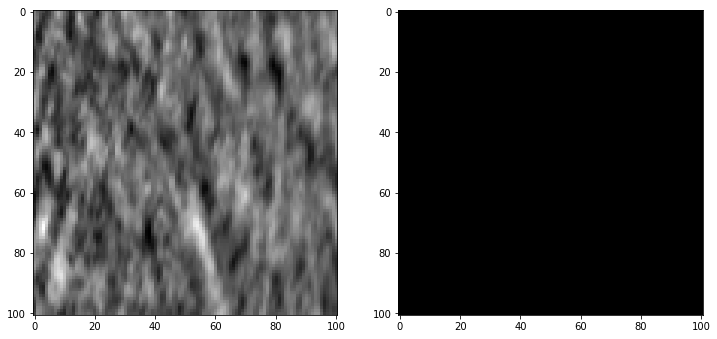

In [11]:
random_index = np.random.randint(0, X_train.shape[0])

fig, ax = plt.subplots(1, 2)

ax[0].imshow(X_train[random_index], cmap='gray')
ax[1].imshow(y_train[random_index], cmap='gray')

### Compute salt coverage (this will serve as a basis for stratified split):

In [12]:
train = compute_coverage(train, y_train)

### Prepare data for training:

In [13]:
kfold = StratifiedKFold(n_splits=5, random_state=1337)

# Add channel features
X_train_ch = np.repeat(np.expand_dims(X_train, axis=-1), 3, -1)
X_train_ch = np.asarray(list(map(lambda x: create_depth_abs_channels(x), X_train_ch)))

# Resize to 224x224, default ResNet50 image size
X_resized = np.asarray(list(map(lambda x: cv2.resize(x, (224, 224)), X_train_ch)))
y_resized = np.asarray(list(map(lambda x: cv2.resize(x, (224, 224)), y_train)))


for train_index, valid_index in kfold.split(train.id.values, train.coverage_class.values):
    
    X_tr, X_val = X_resized[train_index], X_resized[valid_index]
    y_tr, y_val = y_resized[train_index], y_resized[valid_index]
    
    break
    

y_tr = np.expand_dims(y_tr, axis=-1)
y_val = np.expand_dims(y_val, axis=-1)

print(X_tr.shape, y_tr.shape)
print(X_val.shape, y_val.shape)


del X_train_ch, y_resized
del X_resized
gc.collect()

(3196, 224, 224, 3) (3196, 224, 224, 1)
(804, 224, 224, 3) (804, 224, 224, 1)


275

### Loss functions & metric:

In [14]:
from keras.losses import binary_crossentropy


# Dice & combined
def dice_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred = K.cast(y_pred, 'float32')
    y_pred_f = K.cast(K.greater(K.flatten(y_pred), 0.5), 'float32')
    intersection = y_true_f * y_pred_f
    score = 2. * K.sum(intersection) / (K.sum(y_true_f) + K.sum(y_pred_f))
    return score


def dice_loss(y_true, y_pred):
    smooth = 1.
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = y_true_f * y_pred_f
    score = (2. * K.sum(intersection) + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)
    return 1. - score


def bce_dice_loss(y_true, y_pred):
    return binary_crossentropy(y_true, y_pred) + dice_loss(y_true, y_pred)


def bce_logdice_loss(y_true, y_pred):
    return binary_crossentropy(y_true, y_pred) - K.log(1. - dice_loss(y_true, y_pred))



# Lovash loss: https://github.com/bermanmaxim/LovaszSoftmax
def lovasz_grad(gt_sorted):
    """
    Computes gradient of the Lovasz extension w.r.t sorted errors
    See Alg. 1 in paper
    """
    gts = tf.reduce_sum(gt_sorted)
    intersection = gts - tf.cumsum(gt_sorted)
    union = gts + tf.cumsum(1. - gt_sorted)
    jaccard = 1. - intersection / union
    jaccard = tf.concat((jaccard[0:1], jaccard[1:] - jaccard[:-1]), 0)
    return jaccard


# --------------------------- BINARY LOSSES ---------------------------

def lovasz_hinge(logits, labels, per_image=True, ignore=None):
    """
    Binary Lovasz hinge loss
      logits: [B, H, W] Variable, logits at each pixel (between -\infty and +\infty)
      labels: [B, H, W] Tensor, binary ground truth masks (0 or 1)
      per_image: compute the loss per image instead of per batch
      ignore: void class id
    """
    if per_image:
        def treat_image(log_lab):
            log, lab = log_lab
            log, lab = tf.expand_dims(log, 0), tf.expand_dims(lab, 0)
            log, lab = flatten_binary_scores(log, lab, ignore)
            return lovasz_hinge_flat(log, lab)
        losses = tf.map_fn(treat_image, (logits, labels), dtype=tf.float32)
        loss = tf.reduce_mean(losses)
    else:
        loss = lovasz_hinge_flat(*flatten_binary_scores(logits, labels, ignore))
    return loss


def lovasz_hinge_flat(logits, labels):
    """
    Binary Lovasz hinge loss
      logits: [P] Variable, logits at each prediction (between -\infty and +\infty)
      labels: [P] Tensor, binary ground truth labels (0 or 1)
      ignore: label to ignore
    """

    def compute_loss():
        labelsf = tf.cast(labels, logits.dtype)
        signs = 2. * labelsf - 1.
        errors = 1. - logits * tf.stop_gradient(signs)
        errors_sorted, perm = tf.nn.top_k(errors, k=tf.shape(errors)[0], name="descending_sort")
        gt_sorted = tf.gather(labelsf, perm)
        grad = lovasz_grad(gt_sorted)
        loss = tf.tensordot(tf.nn.relu(errors_sorted), tf.stop_gradient(grad), 1, name="loss_non_void")
        return loss

    # deal with the void prediction case (only void pixels)
    loss = tf.cond(tf.equal(tf.shape(logits)[0], 0),
                   lambda: tf.reduce_sum(logits) * 0.,
                   compute_loss,
                   strict=True,
                   name="loss"
                   )
    return loss


def flatten_binary_scores(scores, labels, ignore=None):
    """
    Flattens predictions in the batch (binary case)
    Remove labels equal to 'ignore'
    """
    scores = tf.reshape(scores, (-1,))
    labels = tf.reshape(labels, (-1,))
    if ignore is None:
        return scores, labels
    valid = tf.not_equal(labels, ignore)
    vscores = tf.boolean_mask(scores, valid, name='valid_scores')
    vlabels = tf.boolean_mask(labels, valid, name='valid_labels')
    return vscores, vlabels


def lovasz_loss(y_true, y_pred):
    y_true, y_pred = K.cast(K.squeeze(y_true, -1), 'int32'), K.cast(K.squeeze(y_pred, -1), 'float32')
    #logits = K.log(y_pred / (1. - y_pred))
    logits = y_pred #Jiaxin
    loss = lovasz_hinge(logits, y_true, per_image = True, ignore = None)
    return loss


# IoU metric for observation during training
# https://www.kaggle.com/cpmpml/fast-iou-metric-in-numpy-and-tensorflow
def get_iou_vector(A, B):
    # Numpy version    
    batch_size = A.shape[0]
    metric = 0.0
    for batch in range(batch_size):
        t, p = A[batch], B[batch]
        true = np.sum(t)
        pred = np.sum(p)
        
        # deal with empty mask first
        if true == 0:
            metric += (pred == 0)
            continue
        
        # non empty mask case.  Union is never empty 
        # hence it is safe to divide by its number of pixels
        intersection = np.sum(t * p)
        union = true + pred - intersection
        iou = intersection / union
        
        # iou metrric is a stepwise approximation of the real iou over 0.5
        iou = np.floor(max(0, (iou - 0.45)*20)) / 10
        
        metric += iou
        
    # teake the average over all images in batch
    metric /= batch_size
    return metric


def my_iou_metric(label, pred):
    return tf.py_func(get_iou_vector, [label, pred>0.5], tf.float64)


# For Lovash loss
def my_iou_metric_2(label, pred):
    return tf.py_func(get_iou_vector, [label, pred >0], tf.float64)

### Encoder features - ResNet50:

In ResNet50, each block finishes with a pooling layer, so we can extract features from intermediate layers just before the pooling. This way, when first layer is added as additional extractor, we will have features extracted from 5 layers.
Default input size will be assumed, which is (224, 224, 3).
Layers will be as follows:

- 'activation_1', shape: (None, 112, 112, 64)
- 'activation_10', shape: (None, 56, 56, 256)
- 'activation_22', shape: (None, 28, 28, 512)
- 'activation_40', shape: (None, 14, 14, 1024)
- 'activation_49', shape: (None, 7, 7, 2048)

One thing to keep in mind is that every time a model will be created in the same TF session in the notebook, layer names will change, so above layer names correspond to first creation of the model. In order to reset session, call `K.clear_session()`.

In [15]:
input_size = (224, 224, 3)

base_model = ResNet50(input_shape=input_size, include_top=False)
base_model.summary()

W0325 23:40:35.956015 4425078208 module_wrapper.py:139] From /Users/yoshiko/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0325 23:40:35.962808 4425078208 module_wrapper.py:139] From /Users/yoshiko/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0325 23:40:35.972929 4425078208 module_wrapper.py:139] From /Users/yoshiko/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4185: The name tf.truncated_normal is deprecated. Please use tf.random.truncated_normal instead.

W0325 23:40:35.997277 4425078208 module_wrapper.py:139] From /Users/yoshiko/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_de

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

### Decoder blocks:

Features from ResNet50 will serve as a basis for encoder part of the segmentation model, now a decoder part is needed.
For this part, we will have to create our own blocks. Let's create a very basic block and a second one, which structure will have a more complicated structure.

In [16]:
# Basic decoder block with Conv, BN and PReLU activation.
def decoder_block_simple(
        layer_name, block_name,
        num_filters=32,
        conv_dim=(3, 3)):

    x_dec = Conv2D(
        num_filters, conv_dim,
        padding='same',
        name='{}_conv'.format(block_name))(layer_name)
    x_dec = BatchNormalization(
        name='{}_bn'.format(block_name))(x_dec)
    x_dec = PReLU(
        name='{}_activation'.format(block_name))(x_dec)

    return x_dec

# Decoder block with bottleneck architecture, where middle conv layer
# is half the size of first and last, in order to compress representation.
# This type of architecture is supposed to retain most useful information.
def decoder_block_bottleneck(
        layer_name, block_name,
        num_filters=32,
        conv_dim=(3, 3),
        dropout_frac=0.2):

    x_dec = Conv2D(
        num_filters, conv_dim,
        padding='same',
        name='{}_conv1'.format(block_name))(layer_name)
    x_dec = BatchNormalization(
        name='{}_bn1'.format(block_name))(x_dec)
    x_dec = PReLU(
        name='{}_activation1'.format(block_name))(x_dec)
    x_dec = Dropout(dropout_frac)(x_dec)

    x_dec2 = Conv2D(
        num_filters // 2, conv_dim,
        padding='same',
        name='{}_conv2'.format(block_name))(x_dec)
    x_dec2 = BatchNormalization(
        name='{}_bn2'.format(block_name))(x_dec2)
    x_dec2 = PReLU(
        name='{}_activation2'.format(block_name))(x_dec2)
    x_dec2 = Dropout(dropout_frac)(x_dec2)

    x_dec2 = Conv2D(
        num_filters, conv_dim,
        padding='same',
        name='{}_conv3'.format(block_name))(x_dec2)
    x_dec2 = BatchNormalization(
        name='{}_bn3'.format(block_name))(x_dec2)
    x_dec2 = PReLU(
        name='{}_activation3'.format(block_name))(x_dec2)
    x_dec2 = Dropout(dropout_frac)(x_dec2)

    x_dec2 = Add()([x_dec, x_dec2])

    return x_dec2

### Model definition:

Combine encoder and decoder blocks to create final segmentation model.

In [22]:
# Model is parametrized in a way to enable easy change of decoder_block type,
# as this is an argument that can be given a function, like decoder_block_simple.
def unet_resnet(input_size, decoder_block,
                weights='imagenet',
                loss_func='binary_crossentropy',
                metrics_list=[my_iou_metric],
                use_lovash=False):

    # Base model - encoder
    base_model = ResNet50(
        input_shape=input_size, 
        include_top=False,
        weights=weights)
    
    # Layers for feature extraction in the encoder part
    encoder1 = base_model.get_layer('conv1').output # activation_1
    encoder2 = base_model.get_layer('res2c_branch2c').output # activation_10
    encoder3 = base_model.get_layer('res3d_branch2c').output # activation_22
    encoder4 = base_model.get_layer('res4f_branch2c').output # activation_40
    encoder5 = base_model.get_layer('res5c_branch2c').output # activation_40

    # Center block
    center = decoder_block(
        encoder5, 'center', num_filters=512)
    concat5 = concatenate([center, encoder5], axis=-1)

    # Decoder part.
    # Every decoder block processed concatenated output from encoder and decoder part.
    # This creates skip connections.
    # Afterwards, decoder output is upsampled to dimensions equal to encoder output part.
    decoder4 = decoder_block(
        concat5, 'decoder4', num_filters=256)
    concat4 = concatenate([UpSampling2D()(decoder4), encoder4], axis=-1)

    decoder3 = decoder_block(
        concat4, 'decoder3', num_filters=128)
    concat3 = concatenate([UpSampling2D()(decoder3), encoder3], axis=-1)

    decoder2 = decoder_block(
        concat3, 'decoder2', num_filters=64)
    concat2 = concatenate([UpSampling2D()(decoder2), encoder2], axis=-1)

    decoder1 = decoder_block(
        concat2, 'decoder1', num_filters=64)
    concat1 = concatenate([UpSampling2D()(decoder1), encoder1], axis=-1)

    # Final upsampling and decoder block for segmentation.
    output = UpSampling2D()(concat1)
    output = decoder_block(
        output, 'decoder_output', num_filters=32)
    output = Conv2D(
        1, (1, 1), activation=None, name='prediction')(output)
    if not use_lovash:
        output = Activation('sigmoid')(output)
        
    model = Model(base_model.input, output)
    model.compile(loss=loss_func, optimizer='adam', metrics=metrics_list)

    return model

### Inspect created model:

In [23]:
input_size = (224, 224, 3)


K.clear_session()
model = unet_resnet(
    input_size, decoder_block_simple, weights='imagenet')
model.summary()

W0325 23:55:00.529007 4425078208 module_wrapper.py:139] From /Users/yoshiko/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0325 23:55:00.546543 4425078208 module_wrapper.py:139] From /Users/yoshiko/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0325 23:55:00.552007 4425078208 deprecation.py:323] From /Users/yoshiko/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/tensorflow_core/python/ops/nn_impl.py:183: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0325 23:55:00.564087 4425078208 deprecation.py:323] From <ipython-input-14-910567864b2d>:153: py_func (from tensorflow.python.ops.scr

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

### Train model:

In [24]:
K.clear_session()

# Build model:
# Here, you can experiment with various losses.
# For dice and BCE (binary_crossentropy), my_iou_metric should be used,
# whereas for lovash_loss my_iou_metric2 should be used, because range of values
# for lovash loss is between -inf and +inf, not between 0 and 1, as for BCE and dice.
# What is more, when lovash loss is used, last layer (sigmoid) should be deleted.
# This is controlled by use_lovash parameter.
model_depth = unet_resnet(
    input_size, decoder_block_bottleneck, weights='imagenet',
    loss_func=bce_dice_loss, metrics_list=[my_iou_metric],
    use_lovash=False)
print(model_depth.summary())


model_checkpoint = ModelCheckpoint(
    'unet_resnet.h5' ,monitor='val_my_iou_metric', mode='max',
    save_best_only=True, save_weights_only=True, verbose=1)
reduce_lr = ReduceLROnPlateau(
    monitor='val_my_iou_metric',
    mode='max',
    factor=0.5, 
    patience=5, 
    min_lr=0.0001, 
    verbose=1)


epochs = 2  # 25
batch_size = 16

history = model_depth.fit(X_tr, y_tr,
                    validation_data=[X_val, y_val], 
                    epochs=epochs,
                    batch_size=batch_size,
                    callbacks=[model_checkpoint,reduce_lr], 
                    verbose=1)

W0325 23:58:50.661296 4425078208 deprecation.py:506] From /Users/yoshiko/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

W0325 23:58:55.797235 4425078208 module_wrapper.py:139] From /Users/yoshiko/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0325 23:58:58.745357 4425078208 module_wrapper.py:139] From /Users/yoshiko/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Train on 3196 samples, validate on 804 samples
Epoch 1/2
3196/3196 [==============================] - 6358s 2s/step - loss: 0.8023 - my_iou_metric: 0.3494 - val_loss: 1.1161 - val_my_iou_metric: 0.3042

Epoch 00001: val_my_iou_metric improved from -inf to 0.30423, saving model to unet_resnet.h5
Epoch 2/2
3196/3196 [==============================] - 3048s 954ms/step - loss: 0.6044 - my_iou_metric: 0.4875 - val_loss: 0.6235 - val_my_iou_metric: 0.4924

Epoch 00002: val_my_iou_metric improved from 0.30423 to 0.49241, saving model to unet_resnet.h5


### Validation set prediction and resizing to original size:

In [14]:
val_preds = model_depth.predict(X_val, batch_size=16)

y_val_pred = np.asarray(list(map(lambda x: cv2.resize(x, (101, 101)), val_preds)))
y_val_true = np.asarray(list(map(lambda x: cv2.resize(x, (101, 101)), y_val)))

### Threshold optimization: 

In [15]:
# src: https://www.kaggle.com/aglotero/another-iou-metric
def iou_metric(y_true_in, y_pred_in, print_table=False):
    labels = y_true_in
    y_pred = y_pred_in
    
    true_objects = 2
    pred_objects = 2

    intersection = np.histogram2d(labels.flatten(), y_pred.flatten(), bins=(true_objects, pred_objects))[0]

    # Compute areas (needed for finding the union between all objects)
    area_true = np.histogram(labels, bins = true_objects)[0]
    area_pred = np.histogram(y_pred, bins = pred_objects)[0]
    area_true = np.expand_dims(area_true, -1)
    area_pred = np.expand_dims(area_pred, 0)

    # Compute union
    union = area_true + area_pred - intersection

    # Exclude background from the analysis
    intersection = intersection[1:,1:]
    union = union[1:,1:]
    union[union == 0] = 1e-9

    # Compute the intersection over union
    iou = intersection / union

    # Precision helper function
    def precision_at(threshold, iou):
        matches = iou > threshold
        true_positives = np.sum(matches, axis=1) == 1   # Correct objects
        false_positives = np.sum(matches, axis=0) == 0  # Missed objects
        false_negatives = np.sum(matches, axis=1) == 0  # Extra objects
        tp, fp, fn = np.sum(true_positives), np.sum(false_positives), np.sum(false_negatives)
        return tp, fp, fn

    # Loop over IoU thresholds
    prec = []
    if print_table:
        print("Thresh\tTP\tFP\tFN\tPrec.")
    for t in np.arange(0.5, 1.0, 0.05):
        tp, fp, fn = precision_at(t, iou)
        if (tp + fp + fn) > 0:
            p = tp / (tp + fp + fn)
        else:
            p = 0
        if print_table:
            print("{:1.3f}\t{}\t{}\t{}\t{:1.3f}".format(t, tp, fp, fn, p))
        prec.append(p)
    
    if print_table:
        print("AP\t-\t-\t-\t{:1.3f}".format(np.mean(prec)))
    return np.mean(prec)

def iou_metric_batch(y_true_in, y_pred_in):
    batch_size = y_true_in.shape[0]
    metric = []
    for batch in range(batch_size):
        value = iou_metric(y_true_in[batch], y_pred_in[batch])
        metric.append(value)
    return np.mean(metric)

In [16]:
# Threshold range, over which optimization is performed
thresholds = np.arange(0.2, 0.9, 0.02)

# For every threshold, set predictions to binary arrays, 
# where values above threshold are treated as 1 and the rest as 0.
# Loop over thresholds and compute IoU for them based on IoU function above.
ious = np.array(
    [iou_metric_batch(y_val_true,
                      np.int32(y_val_pred > threshold)) for threshold in tqdm(thresholds)])

100%|██████████| 35/35 [00:35<00:00,  1.26s/it]


In [17]:
df_iou = pd.DataFrame(thresholds, columns=['threshold'])
df_iou['iou'] = ious

# Get index of best IoU
best_index = df_iou['iou'].idxmax()
print('Best IoU: {:.4f} at threshold: {:.3f}'.format(
    df_iou.iou[best_index], df_iou.threshold[best_index]))

# Describe IoU DF
df_iou.describe()

Best IoU: 0.2805 at threshold: 0.880


,threshold,iou
count,35.000000,35.000000
mean,0.540000,0.223362
std,0.204939,0.021597
min,0.200000,0.206841
25%,0.370000,0.209080
50%,0.540000,0.211940
75%,0.710000,0.228545
max,0.880000,0.280473


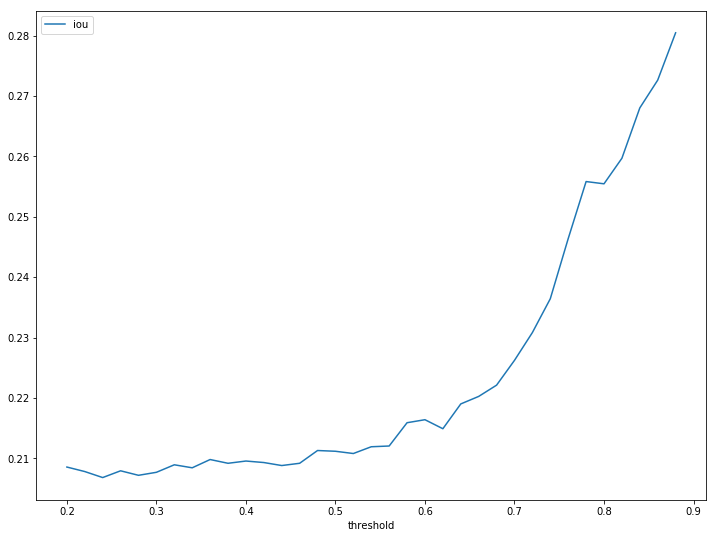

In [18]:
# Plot IoU values over threshold range.
df_iou.plot(x='threshold', y='iou')

## Conclusions:

- Pretrained models can be used for segmentation problems:
    - Some of architectures can be easily adapted to the problem (ie ResNet)
    - Other architectures may require more experimentation with selection of proper layers for feature extraction and padding (example of using [Xception](https://www.kaggle.com/meaninglesslives/getting-0-87-on-private-lb-using-kaggle-kernel). )
    - You can experiment with selection of layers for feature extraction
    - For some models, you can also try to experiment with number of encoder/decoder blocks
- Threshold optimization is important in problems, where direct metric optimization during training is difficult.
    - It it possible to use more involved optimization methods (from [scipy optimize](https://docs.scipy.org/doc/scipy/reference/optimize.html)), although this may not be optimal unless distribution of train and test set are very similar. Overoptimization of threshold or any other parameter on validation set may result in worse test set results.
- Experiment with various losses - BCE, Dice, combined BCE with Dice, Lovash loss.
    - Models trained with various losses may give different results, which may be advantageous when ensembling.


### Possible experiments:

- Change type of decoder block in created segmentation model
- Create your own decoder blocks
- Train with other losses
- Train longer
- Train with BCE/Dice, save the model, then load weights and finetune with Lovash loss
- Try different ranges and intervals for threshold optimization

In [5]:
np.int32(0.7 > 1)

0

In [ ]:
def get_iou_vector(A, B):
    # Numpy version
    
    batch_size = A.shape[0]
    metric = 0.0
    for batch in range(batch_size):
        t, p = A[batch], B[batch]
        true = np.sum(t)
        pred = np.sum(p)
        
        # deal with empty mask first
        if true == 0:
            metric += (pred == 0)
            continue
        
        # non empty mask case.  Union is never empty 
        # hence it is safe to divide by its number of pixels
        intersection = np.sum(t * p)
        union = true + pred - intersection
        iou = intersection / union
        
        # iou metrric is a stepwise approximation of the real iou over 0.5
        iou = np.floor(max(0, (iou - 0.45)*20)) / 10
        
        metric += iou
        
    # teake the average over all images in batch
    metric /= batch_size
    return metric